In [1]:
import torch
torch.set_default_dtype(torch.float32)

import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

import utils as UT
import optimizers as OPT
import config as CFG

import importlib
importlib.reload(CFG)
importlib.reload(OPT)
importlib.reload(UT)

<module 'utils' from '/home/solomon/BSGD/utils.py'>

In [2]:
output_plots_dir = 'FINAL_CMP'
saveData = True
import os
try:
    os.mkdir('./'+output_plots_dir)
except OSError as error:
    print(output_plots_dir + " already exists!")

if saveData:
    try:
        os.mkdir('./'+output_plots_dir+'/data_files')
    except OSError as error:
        print(output_plots_dir + '/data_files' + " already exists!")
A_trans = np.genfromtxt('./data_files/A_1000.csv', delimiter=',')

FINAL_CMP already exists!
FINAL_CMP/data_files already exists!


In [3]:
CFG.N

100

In [4]:
pi = np.random.randn(UT.N)
pi[pi < 0] = 0
pi /= np.sum(pi)

In [5]:
#########################################################
############## BATCH COORDINATE DESCENT #################
#########################################################

## NOISLESS EXACT GRADIENTS CONFIGURATION
ITR_LIM = 10000
snr = np.inf
approx = None
mu_noise = 0
batch_size = 512
delta = 0.2
MC = False
seed = 69
c = 1e-2
eps = 1e-2
is_BCD = False
scheduler = True
#######################################################
# algorithms = ["GD", "NAG", "HB", "ADAM", "NADAM", "ADAGRAD", "ADADELTA", "RMSPROP"]
algorithms = ["ADAM", "NADAM", "ADAGRAD", "RMSPROP", "GD", "HB", "NAG"]
# algorithms = ["ADADELTA"]
#######################################################

exact = {}
for a in algorithms:
    exact[a] = UT.simulate(CFG.df, CFG.f, eval("OPT."+a), approx=approx, mu_noise=mu_noise, snr=snr, batch_size=batch_size, is_BCD=is_BCD, delta=delta, seed=seed, isDNN=CFG.isDNN, scheduler=scheduler, c=c, eps=eps, MC=MC, A_trans=A_trans, pi=pi, ITR_LIM=ITR_LIM)
######################################################

## 50dB-NOISY EXACT GRADIENTS CONFIGURATION

snr_exact = 10
approx = None
mu_noise = 0
batch_size = 512
seed = 69
#####################################################

exact_noisy = {}
for a in algorithms:
    exact_noisy[a] = UT.simulate(CFG.df, CFG.f, eval("OPT."+a), approx=approx, mu_noise=mu_noise, snr=snr_exact, batch_size=batch_size, is_BCD=is_BCD, delta=delta, seed=seed, isDNN=CFG.isDNN, scheduler=scheduler, c=c, eps=eps, MC=MC, A_trans=A_trans, pi=pi, ITR_LIM=ITR_LIM)

inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 7180.18it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 7375.61it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 11117.45it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 10206.22it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 15400.93it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 13155.52it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 9575.25it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 5029.55it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:02<00:00, 4835.96it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 7037.58it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6704.66it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 8627.67it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 8038.56it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6262.06it/s]


In [6]:

## APPROX GRADIENTS CONFIGURATION

snr = np.inf
approx = 1
mu_noise = 0
batch_size = 64
seed = 69
#####################################################

apprx = {}
for a in algorithms:
    apprx[a] = UT.simulate(CFG.f, CFG.f, eval("OPT."+a), approx=approx, mu_noise=mu_noise, snr=snr, batch_size=batch_size, is_BCD=is_BCD, delta=delta, seed=seed, isDNN=CFG.isDNN, scheduler=scheduler, c=c, eps=eps, MC=MC, A_trans=A_trans, pi=pi, ITR_LIM=ITR_LIM)
    
## 10dB GRADIENTS CONFIGURATION

snr_approx = 10
approx = 1
seed = 69
#####################################################

apprx_noisy = {}
for a in algorithms:
    apprx_noisy[a] = UT.simulate(CFG.f, CFG.f, eval("OPT."+a), approx=approx, mu_noise=mu_noise, snr=snr_approx, batch_size=batch_size, is_BCD=is_BCD, delta=delta, seed=seed, isDNN=CFG.isDNN, scheduler=scheduler, c=c, eps=eps, MC=MC, A_trans=A_trans, pi=pi, ITR_LIM=ITR_LIM)

inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|████████████████████████████████████| 10000/10000 [00:21<00:00, 468.42it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|████████████████████████████████████| 10000/10000 [00:22<00:00, 450.41it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|████████████████████████████████████| 10000/10000 [00:21<00:00, 457.97it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|████████████████████████████████████| 10000/10000 [00:23<00:00, 426.92it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|████████████████████████████████████| 10000/10000 [00:23<00:00, 416.78it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|████████████████████████████████████| 10000/10000 [00:22<00:00, 436.94it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|████████████████████████████████████| 10000/10000 [00:23<00:00, 418.52it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|████████████████████████████████████| 10000/10000 [00:28<00:00, 356.50it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|████████████████████████████████████| 10000/10000 [00:27<00:00, 359.12it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|████████████████████████████████████| 10000/10000 [00:27<00:00, 357.59it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|████████████████████████████████████| 10000/10000 [00:28<00:00, 352.32it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|████████████████████████████████████| 10000/10000 [00:28<00:00, 350.19it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|████████████████████████████████████| 10000/10000 [00:25<00:00, 391.50it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|████████████████████████████████████| 10000/10000 [00:29<00:00, 343.85it/s]


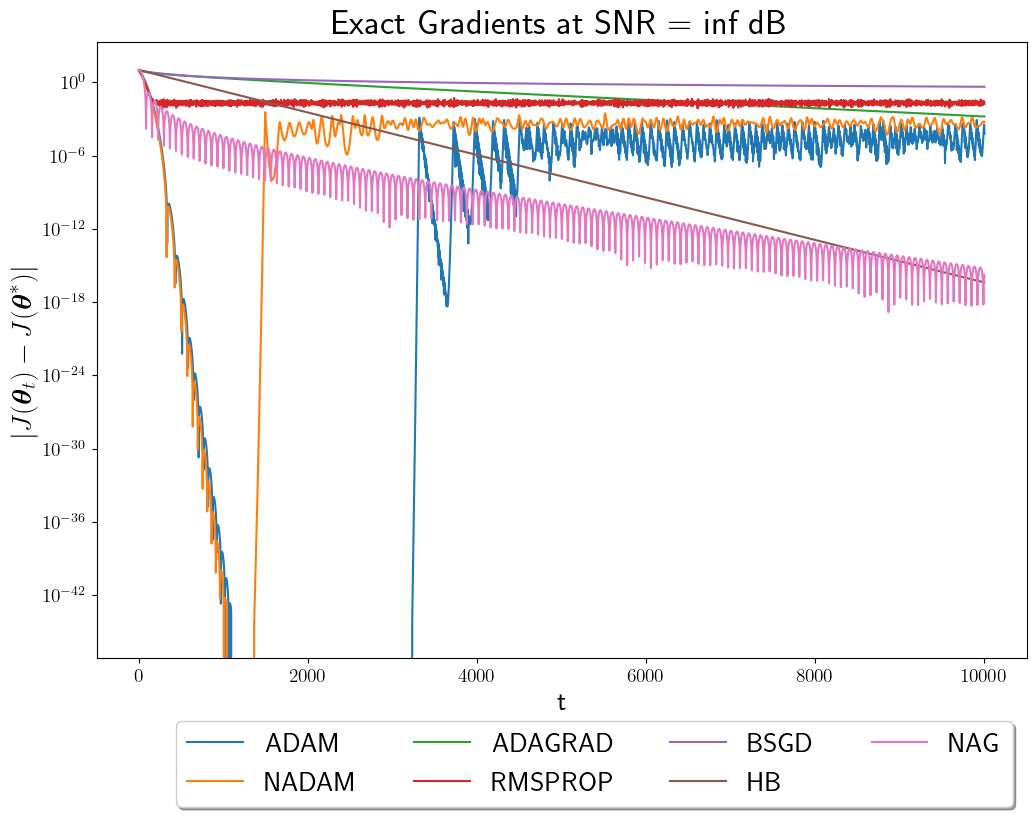

In [7]:
plt.figure(figsize=(12, 8))
plt.title(r"Exact Gradients at SNR = {} dB".format(snr), fontsize=25)

for k in exact.keys():
    plt.semilogy(exact[k], label="{}".format(k) if k != "GD" else "BSGD")
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'$|J({\boldsymbol {\theta}_t}) - J({\boldsymbol {\theta}^*})|$', fontsize=20)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.legend(loc='upper right', bbox_to_anchor=(1, -0.08),
          fancybox=True, shadow=True, ncol=4, fontsize=20)

plt.savefig('./'+output_plots_dir+'/exact.jpg', bbox_inches='tight')
plt.show()

# if saveData:
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx.npy', values_gd_approx)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_noisy.npy', values_gd_approx_noisy)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_blum.npy', values_gd_approx_blum)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_blum_noisy.npy', values_gd_approx_blum_noisy)

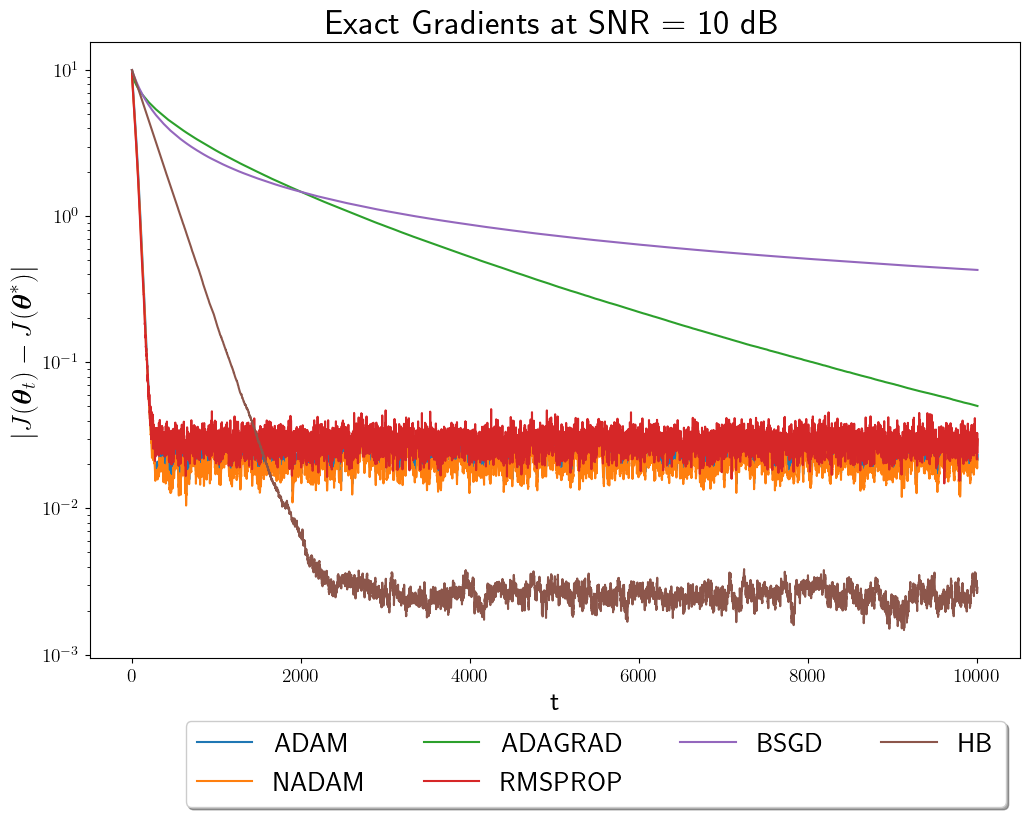

In [8]:
plt.figure(figsize=(12, 8))
plt.title(r"Exact Gradients at SNR = {} dB".format(snr_exact), fontsize=25)

for k in exact_noisy.keys():
    if k == "NAG":
        continue
    plt.semilogy(exact_noisy[k], label="{}".format(k) if k != "GD" else "BSGD")
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'$|J({\boldsymbol {\theta}_t}) - J({\boldsymbol {\theta}^*})|$', fontsize=20)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.legend(loc='upper right', bbox_to_anchor=(1, -0.08),
          fancybox=True, shadow=True, ncol=4, fontsize=20)
plt.savefig('./'+output_plots_dir+'/exact_noisy.jpg', bbox_inches='tight')

plt.show()

# if saveData:
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx.npy', values_gd_approx)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_noisy.npy', values_gd_approx_noisy)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_blum.npy', values_gd_approx_blum)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_blum_noisy.npy', values_gd_approx_blum_noisy)

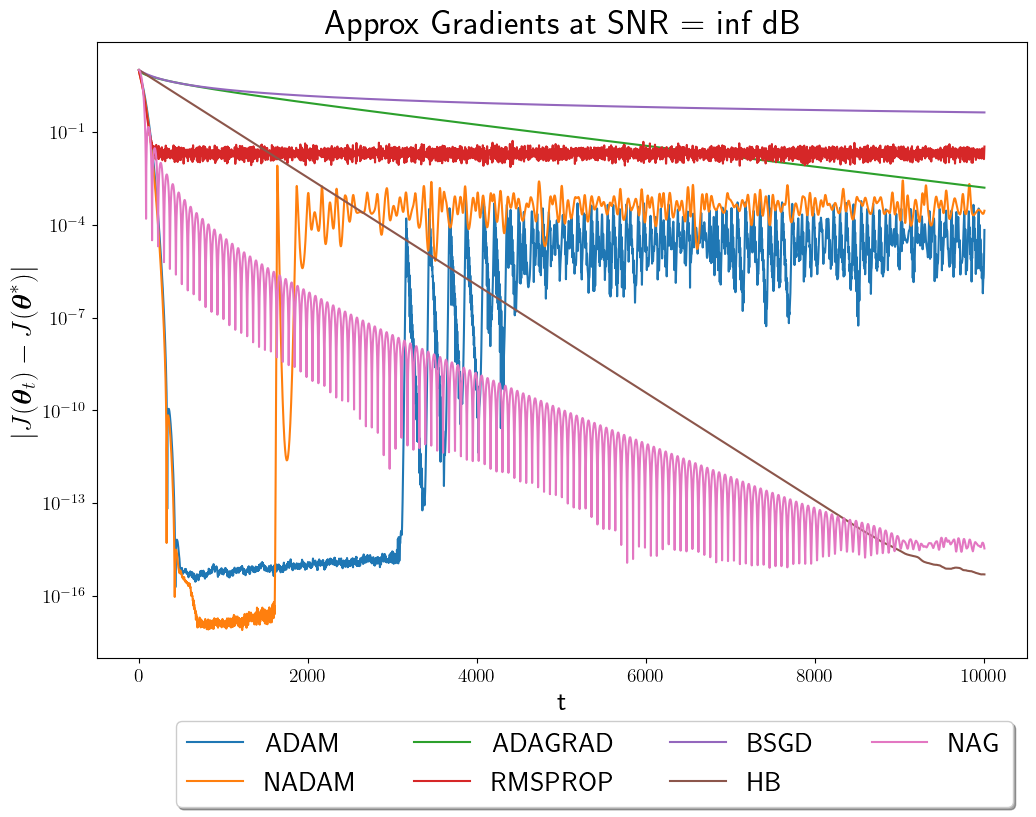

In [9]:
plt.figure(figsize=(12, 8))
plt.title(r"Approx Gradients at SNR = {} dB".format(snr), fontsize=25)

for k in apprx.keys():
    plt.semilogy(apprx[k], label="{}".format(k) if k != "GD" else "BSGD")
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'$|J({\boldsymbol {\theta}_t}) - J({\boldsymbol {\theta}^*})|$', fontsize=20)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.legend(loc='upper right', bbox_to_anchor=(1, -0.08),
          fancybox=True, shadow=True, ncol=4, fontsize=20)

plt.savefig('./'+output_plots_dir+'/approx.jpg', bbox_inches='tight')
plt.show()

# if saveData:
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx.npy', values_gd_approx)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_noisy.npy', values_gd_approx_noisy)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_blum.npy', values_gd_approx_blum)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_blum_noisy.npy', values_gd_approx_blum_noisy)

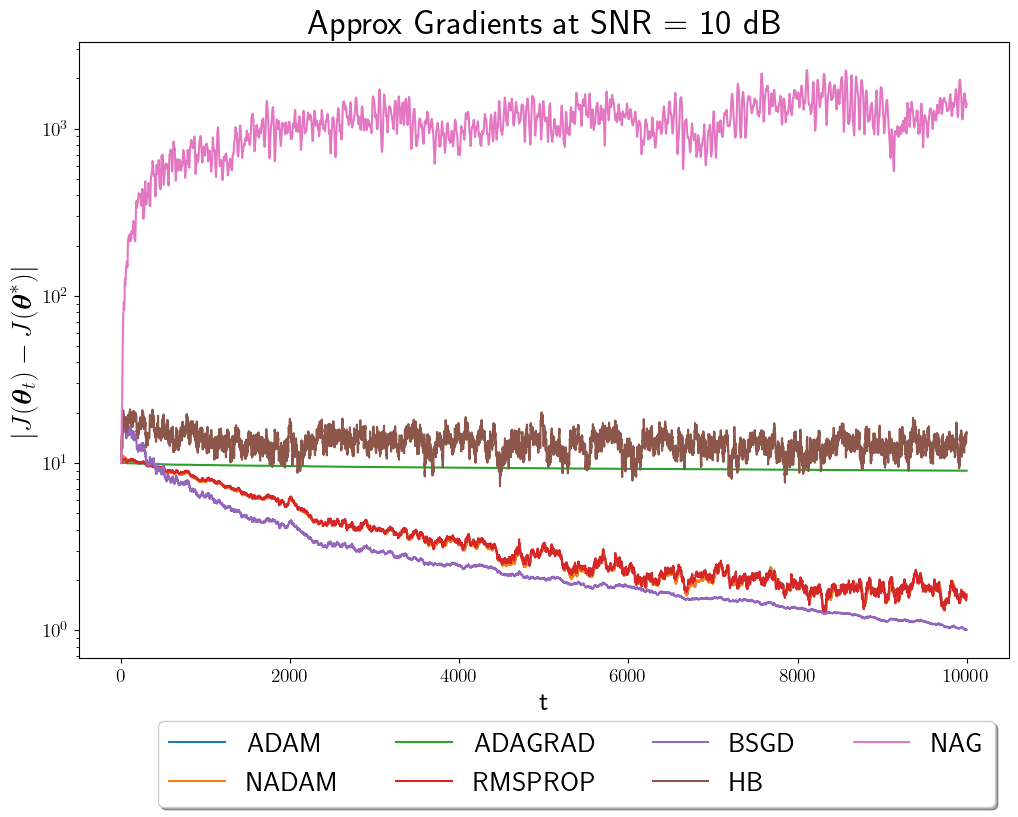

In [10]:
plt.figure(figsize=(12, 8))
plt.title(r"Approx Gradients at SNR = {} dB".format(snr_approx), fontsize=25)

for k in apprx_noisy.keys():
#     if k == "NAG":
#         continue
    plt.semilogy(apprx_noisy[k], label="{}".format(k) if k != "GD" else "BSGD")
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'$|J({\boldsymbol {\theta}_t}) - J({\boldsymbol {\theta}^*})|$', fontsize=20)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.legend(loc='upper right', bbox_to_anchor=(1, -0.08),
          fancybox=True, shadow=True, ncol=4, fontsize=20)
plt.savefig('./'+output_plots_dir+'/approx_noisy.jpg', bbox_inches='tight')
plt.show()

# if saveData:
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx.npy', values_gd_approx)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_noisy.npy', values_gd_approx_noisy)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_blum.npy', values_gd_approx_blum)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_blum_noisy.npy', values_gd_approx_blum_noisy)

In [15]:
import pickle

def save_dict(apprx_noisy, file):
    with open(file, 'wb') as fd:
        pickle.dump(apprx_noisy, fd)
        fd.close()
save_dict(exact, './' + output_plots_dir + '/exact.pkl')
save_dict(exact_noisy, './' + output_plots_dir + '/exact_noisy.pkl')
save_dict(apprx, './' + output_plots_dir + '/approx.pkl')
save_dict(apprx_noisy, './' + output_plots_dir + '/approx_noisy.pkl')

# BCD

In [16]:
#########################################################
############## BATCH COORDINATE DESCENT #################
#########################################################

## NOISLESS EXACT GRADIENTS CONFIGURATION
ITR_LIM = 10000
snr = np.inf
approx = None
mu_noise = 0
batch_size = 512
delta = 0.2
MC = False
seed = 69
c = 1e-2
eps = 1e-2
is_BCD = True
scheduler = True
#######################################################
# algorithms = ["GD", "NAG", "HB", "ADAM", "NADAM", "ADAGRAD", "ADADELTA", "RMSPROP"]
# algorithms = ["ADADELTA"]
#######################################################

exact = {}
for a in algorithms:
    exact[a] = UT.simulate(CFG.df, CFG.f, eval("OPT."+a), approx=approx, mu_noise=mu_noise, snr=snr, batch_size=batch_size, is_BCD=is_BCD, delta=delta, seed=seed, isDNN=CFG.isDNN, scheduler=scheduler, c=c, eps=eps, MC=MC, A_trans=A_trans, pi=pi, ITR_LIM=ITR_LIM)
######################################################

## 50dB-NOISY EXACT GRADIENTS CONFIGURATION

snr_exact = 10
approx = None
mu_noise = 0
batch_size = 512
seed = 69
#####################################################

exact_noisy = {}
for a in algorithms:
    exact_noisy[a] = UT.simulate(CFG.df, CFG.f, eval("OPT."+a), approx=approx, mu_noise=mu_noise, snr=snr_exact, batch_size=batch_size, is_BCD=is_BCD, delta=delta, seed=seed, isDNN=CFG.isDNN, scheduler=scheduler, c=c, eps=eps, MC=MC, A_trans=A_trans, pi=pi, ITR_LIM=ITR_LIM)

inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:02<00:00, 3728.04it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:02<00:00, 3374.20it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:02<00:00, 3927.53it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:02<00:00, 4108.64it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:02<00:00, 4866.47it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:02<00:00, 4694.93it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:02<00:00, 3846.58it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:03<00:00, 3033.08it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:03<00:00, 2669.44it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:03<00:00, 3242.54it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:03<00:00, 3137.22it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:04<00:00, 2349.15it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:03<00:00, 3136.18it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:04<00:00, 2355.89it/s]


In [17]:

## APPROX GRADIENTS CONFIGURATION

snr = np.inf
approx = 1
mu_noise = 0
batch_size = 64
seed = 69
#####################################################

apprx = {}
for a in algorithms:
    apprx[a] = UT.simulate(CFG.f, CFG.f, eval("OPT."+a), approx=approx, mu_noise=mu_noise, snr=snr, batch_size=batch_size, is_BCD=is_BCD, delta=delta, seed=seed, isDNN=CFG.isDNN, scheduler=scheduler, c=c, eps=eps, MC=MC, A_trans=A_trans, pi=pi, ITR_LIM=ITR_LIM)

inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:08<00:00, 1200.89it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:08<00:00, 1201.69it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:08<00:00, 1123.60it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:07<00:00, 1255.25it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:09<00:00, 1108.70it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:08<00:00, 1230.27it/s]


inf
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:07<00:00, 1310.83it/s]


In [18]:
    
## 10dB GRADIENTS CONFIGURATION

snr_approx = 10
approx = 1
seed = 69
#####################################################

apprx_noisy = {}
for a in algorithms:
#     if a == "GD":
    apprx_noisy[a] = UT.simulate(CFG.f, CFG.f, eval("OPT."+a), approx=approx, mu_noise=mu_noise, snr=snr_approx, batch_size=batch_size, is_BCD=is_BCD, delta=delta, seed=seed, isDNN=CFG.isDNN, scheduler=scheduler, c=c, eps=eps, MC=MC, A_trans=A_trans, pi=pi, ITR_LIM=ITR_LIM)

10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|████████████████████████████████████| 10000/10000 [00:10<00:00, 933.77it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|████████████████████████████████████| 10000/10000 [00:10<00:00, 909.83it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|████████████████████████████████████| 10000/10000 [00:10<00:00, 913.30it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|████████████████████████████████████| 10000/10000 [00:11<00:00, 871.16it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|███████████████████████████████████| 10000/10000 [00:09<00:00, 1047.10it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|████████████████████████████████████| 10000/10000 [00:11<00:00, 900.57it/s]


10
Initial Value: [10.029308] Optimal Value: 0.0 #Params: 100


100%|████████████████████████████████████| 10000/10000 [00:10<00:00, 977.06it/s]


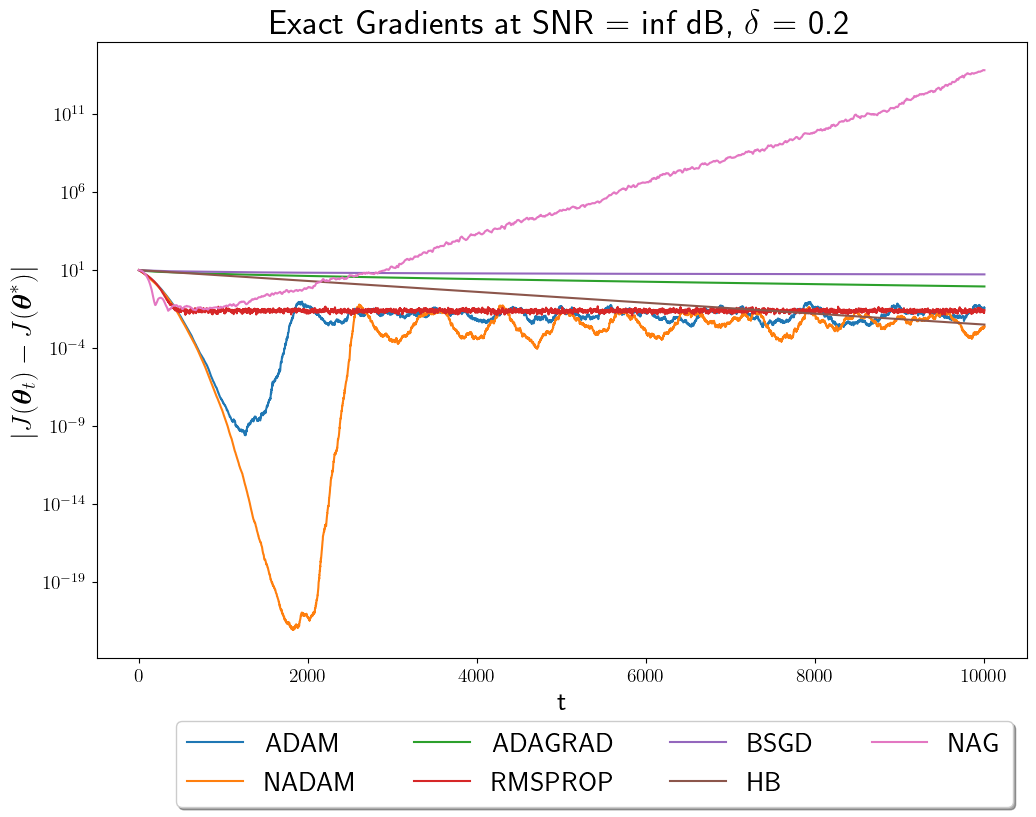

In [19]:
plt.figure(figsize=(12, 8))
plt.title(r"Exact Gradients at SNR = {} dB, $\delta$ = {}".format(snr, delta), fontsize=25)

for k in exact.keys():
    plt.semilogy(exact[k], label="{}".format(k) if k != "GD" else "BSGD")
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'$|J({\boldsymbol {\theta}_t}) - J({\boldsymbol {\theta}^*})|$', fontsize=20)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.legend(loc='upper right', bbox_to_anchor=(1, -0.08),
          fancybox=True, shadow=True, ncol=4, fontsize=20)
plt.savefig('./'+output_plots_dir+'/exact_bcd.jpg', bbox_inches='tight')
plt.show()

# if saveData:
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx.npy', values_gd_approx)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_noisy.npy', values_gd_approx_noisy)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_blum.npy', values_gd_approx_blum)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_blum_noisy.npy', values_gd_approx_blum_noisy)

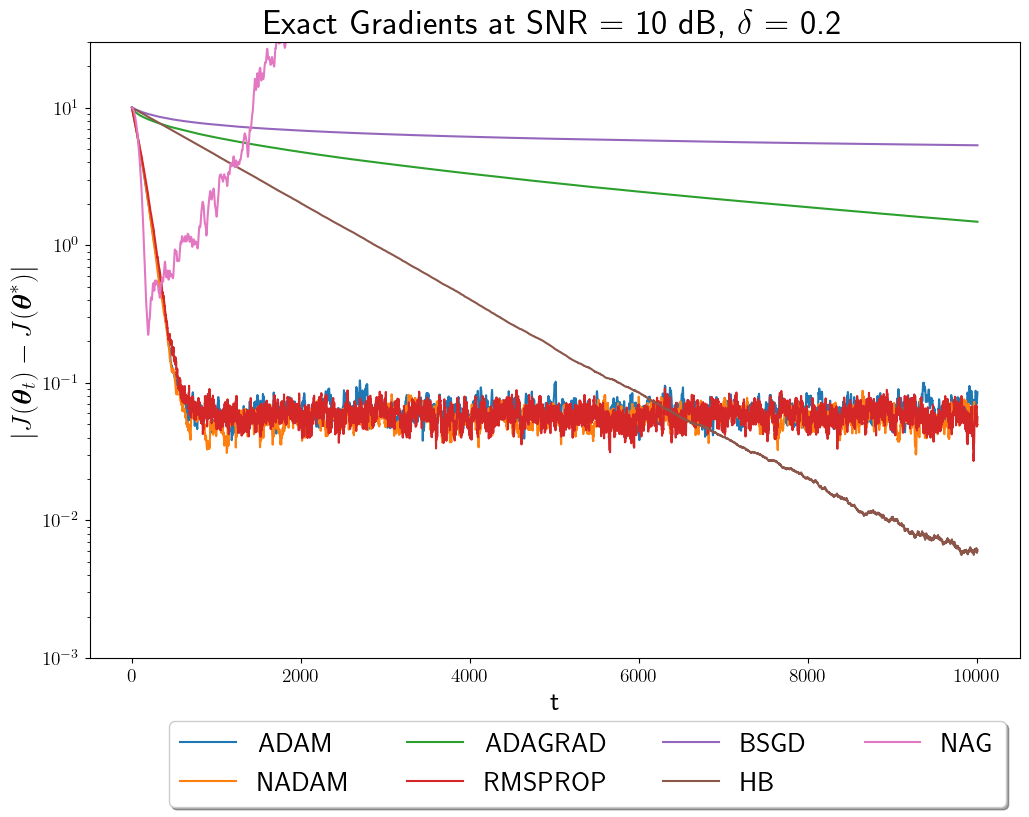

In [27]:
plt.figure(figsize=(12, 8))
plt.title(r"Exact Gradients at SNR = {} dB, $\delta$ = {}".format(snr_exact, delta), fontsize=25)

for k in exact_noisy.keys():
#     if k == "NAG":
#         continue
    plt.semilogy(exact_noisy[k], label="{}".format(k) if k != "GD" else "BSGD")
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'$|J({\boldsymbol {\theta}_t}) - J({\boldsymbol {\theta}^*})|$', fontsize=20)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim([1e-3,30])
plt.legend(loc='upper right', bbox_to_anchor=(1, -0.08),
          fancybox=True, shadow=True, ncol=4, fontsize=20)
plt.savefig('./'+output_plots_dir+'/exact_noisy_bcd.jpg', bbox_inches='tight')
plt.show()

# if saveData:
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx.npy', values_gd_approx)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_noisy.npy', values_gd_approx_noisy)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_blum.npy', values_gd_approx_blum)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_blum_noisy.npy', values_gd_approx_blum_noisy)

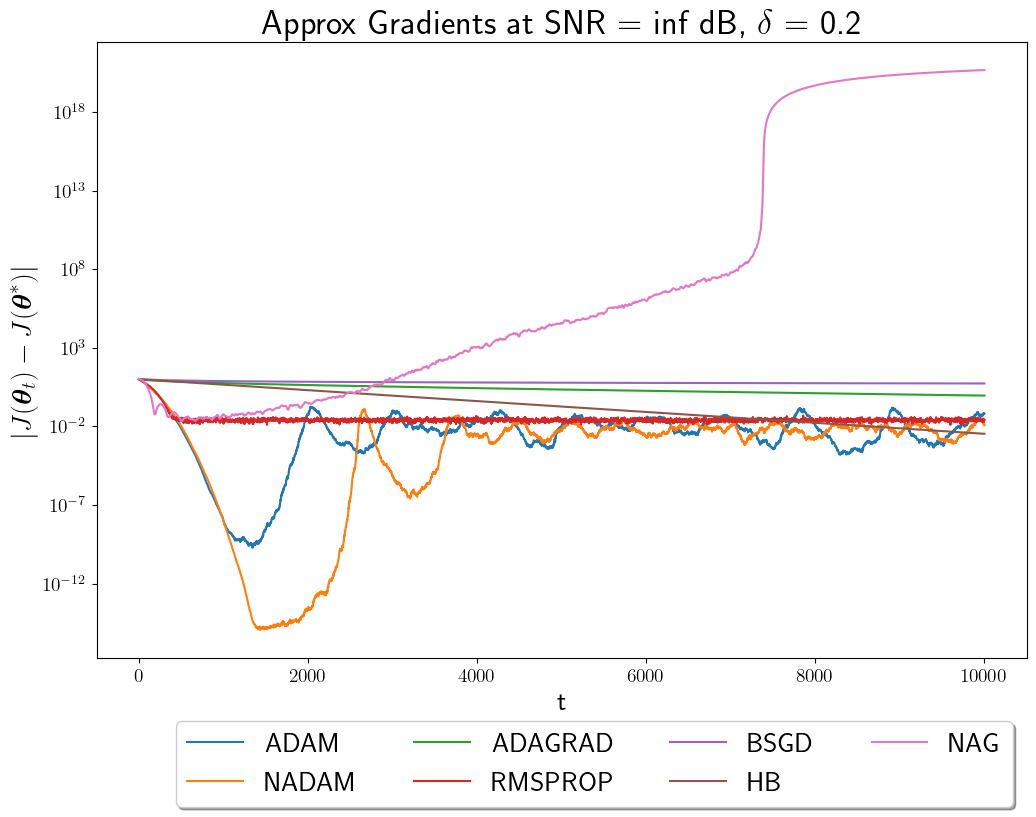

In [21]:
plt.figure(figsize=(12, 8))
plt.title(r"Approx Gradients at SNR = {} dB, $\delta$ = {}".format(snr, delta), fontsize=25)

for k in apprx.keys():
    plt.semilogy(apprx[k], label="{}".format(k) if k != "GD" else "BSGD")
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'$|J({\boldsymbol {\theta}_t}) - J({\boldsymbol {\theta}^*})|$', fontsize=20)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
# plt.ylim([1e-13, 30])
plt.legend(loc='upper right', bbox_to_anchor=(1, -0.08),
          fancybox=True, shadow=True, ncol=4, fontsize=20)
plt.savefig('./'+output_plots_dir+'/approx_bcd.jpg', bbox_inches='tight')
plt.show()

# if saveData:
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx.npy', values_gd_approx)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_noisy.npy', values_gd_approx_noisy)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_blum.npy', values_gd_approx_blum)
#     np.save('./'+output_plots_dir+'/data_files' + '/values_gd_approx_blum_noisy.npy', values_gd_approx_blum_noisy)

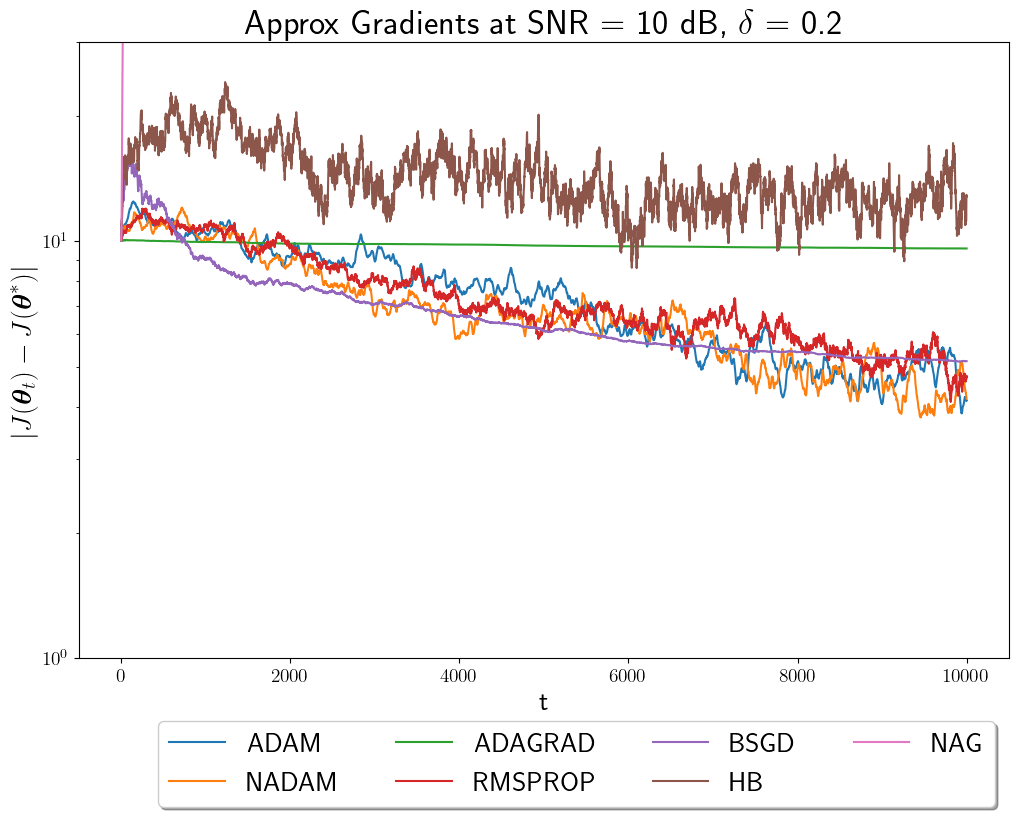

In [22]:
plt.figure(figsize=(12, 8))
plt.title(r"Approx Gradients at SNR = {} dB, $\delta$ = {}".format(snr_approx, delta), fontsize=25)

for k in apprx_noisy.keys():
#     if k == "NAG":
#         continue
    plt.semilogy(apprx_noisy[k], label="{}".format(k) if k != "GD" else "BSGD")
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'$|J({\boldsymbol {\theta}_t}) - J({\boldsymbol {\theta}^*})|$', fontsize=20)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim([1,30])
plt.legend(loc='upper right', bbox_to_anchor=(1, -0.08),
          fancybox=True, shadow=True, ncol=4, fontsize=20)
plt.savefig('./'+output_plots_dir+'/approx_noisy_bcd.jpg', bbox_inches='tight')
plt.show()

if saveData:
    for k in apprx_noisy.keys():
        np.save('./'+output_plots_dir+'/data_files' + '/apprx_noisy_{}.npy'.format(k), apprx_noisy[k])

In [23]:
save_dict(exact, './' + output_plots_dir + '/exact_bcd.pkl')
save_dict(exact_noisy, './' + output_plots_dir + '/exact_noisy_bcd.pkl')
save_dict(apprx, './' + output_plots_dir + '/approx_bcd.pkl')
save_dict(apprx_noisy, './' + output_plots_dir + '/approx_noisy_bcd.pkl')